In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import warnings

# Options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

<h1>План проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Значения-аббревиатур-игровой-платформы." data-toc-modified-id="Значения-аббревиатур-игровой-платформы.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Значения аббревиатур игровой платформы.</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные до 2016 года (данные за 2016 год могут быть неполными). Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

### Знакомство с данными

In [2]:
# Загрузка данных
#df = pd.read_csv('games.csv',sep =',')

df = pd.read_csv('/datasets/games.csv',sep =',')

print(display(df.head(2)))
data_shape_original = df.shape[0] #размер raw данных
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales —* продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Значения аббревиатур игровой платформы.
* '2600', 'Atari 2600'
* 'Wii', 'Nintendo Wii'
* 'NES', 'Nintendo NES'
* 'GB', 'GB-60'
* 'DS', 'Nintendo DS'
* 'X360', 'Xbox 360'
* 'SNES', 'Nintendo SNES'
* 'GBA', 'Game Boy Advance'
* '3DS', 'Nintendo 3DS'
* 'N64', 'Nintendo 64'
* 'XB', 'Xbox'
* 'XOne', 'Xbox One'
* 'WiiU', 'Nintendo Wii U'
* 'GC', 'Nintendo GameCube'
* 'GEN', 'SEGA Retro Genesis'
* 'DC', 'Dendy Classic'
* 'PSV', 'PS Vita'
* 'SAT', 'Sega Saturn'
* 'WS', 'WonderSwan'
* 'TG16', 'NEC TurboGrafx'
* '3DO', 'Panasonic 3DO'
* 'GG', 'Game Gear'
* 'PCFX', 'NEC PC-FX'

### Подготовка данных

In [3]:
# Пустые значения
pd.DataFrame(df.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
Name,0.0
Platform,0.0
Year_of_Release,1.6
Genre,0.0
NA_sales,0.0
EU_sales,0.0
JP_sales,0.0
Other_sales,0.0
Critic_Score,51.3
User_Score,40.1


In [4]:
#переименуем название столбцов
#df.columns = [x.lower() for x in df.columns]
df.columns = df.columns.str.lower()

#меняем типы данных
df['year_of_release'] = df['year_of_release'].astype('Int64') # меняем год на int

# тип user_score поменяем на float, однако сначала заменим tbd на nan
df[df['user_score']=='tbd']
# tbd = To Be Determined - рейтинг, который еще не определили, можем заменить данные на nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')


#изучение рейтинга
df['rating'].unique()
#первоначально "K-A" ("Kids to Adults"), потом было переименовано на E10+
df['rating'] = df['rating'].replace('K-A', 'E10+')

#### Работа с пропусками

In [5]:
#кол-во пустых значений
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [6]:
### name
#удаляем 2 строки, где нет name
df = df[~df['name'].isna()]

# удаляем дубликаты
df = df.drop_duplicates().reset_index(drop = True)

### year_of_release
#маленькую часть пропусков в year_of_release можно вытащить из названия, уменьшив год на 1
df['name'] = df['name'].apply(str) #меняем название в строку
df['year'] = df['name'].str.extract('(\d+)') #создаем новую колонку, с числом из названия
df['year'] = df['year'].fillna(0).astype(int)
df.loc[((df['year_of_release'].isna())&(df['year']>2000)), 'year_of_release'] = df['year']-1
df = df.drop(columns = ['year'])

#удаляем 252 строки, где нет года
df = df[~df['year_of_release'].isna()]

###critic_score и user_score
#не будем менять пропуски в critic_score и user_score медианой
# df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())
# df['user_score'] = df['user_score'].fillna(df['user_score'].median())

### rating
#пропусков в rating сликшом много для удаения. Пока оставим как есть

In [7]:
# Процент удаленных данных
print('% удаленных строк:', round((1-df.shape[0]/data_shape_original)*100))
df.isna().sum()

% удаленных строк: 2


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating             6682
dtype: int64

При подготовке данных к анализу были приведены названия столбцов к низкому регистру. Также у year_of_release сменился тип данных с float на int, у user_score с object на float. При этом значение tbd (неопределенный рейтинг) у user_score был заменен на пустые значения. Устаревшее значение K-A в столбце rating заменили на актуальное E10+.

Обработка пропусков:
* Столбец name. Удалены 2 строки без названий игры. Скорее всего названия не завели при заведении данных
* Столбец year_of_release. Маленькую часть пропусков мы заполнили значением года из названия игры -1 (чаще всего год релиза это год раньше чем он написан в названии игры). Остальные пропуски были удаенны из датасета.
* Столбцы critic_score и user_score. Так как пустых данных было много, пропуски вместо удаления были заменены медианными значениями показателей. Игры возможно не были оценены так как недавно вышли или просто не имеют оценок.
* Столбец rating. Возрастную категорию присваивает организация, возможно какие-то игры она упустила. Самостоятельно присвоить категорию игре мы не сможем. При удалении пустых значений, мы бы удалили 40% данных, это слишком много, поэтому было принято решение на данном этапе оставить строки с пустым рейтингом.

При обработке пропусков было удалено 2% данных.

### Исследовательский анализ данных

In [8]:
# добавим столбец с суммарным кол-вом проданных копий во всех регионах 
#df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


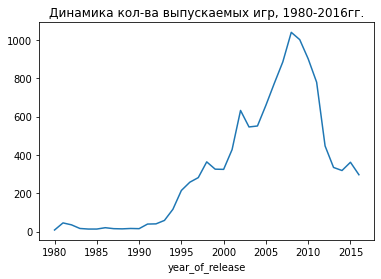

In [9]:
# сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
df.groupby('year_of_release')['name'].nunique().plot();
plt.title('Динамика кол-ва выпускаемых игр, 1980-2016гг.');

count    16461.000000
mean      2006.484600
std          5.873512
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


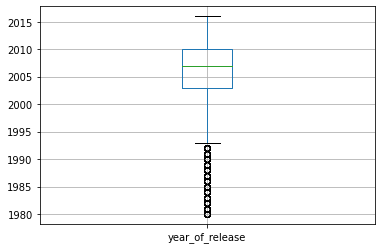

In [10]:
print(df['year_of_release'].describe())
df.boxplot('year_of_release');

*Историческая справка:* С 1967 года начался период популярности домашних консолей и аркадных игр, который продлился до 1983 года, когда случилось перенасыщение рынка игровых приставок, появилось много некачественных игр, стала усиливаться конкуренция со стороны компьютерных игр. В 1985 году консольная индустрия видеоигр начала восстанавливаться, благодаря появлению Nintendo и ее культовых франшиз, такие как Super Mario и The Legend of Zelda. В 1989 году началась сильная конкуренция консолей Nintendo и Sega, которая дала сильное развитие индустрии в 90-е годы (например в 95 году Sony впервые анонсировала 3-х мерные игры на дисках). В 2001 началась гонка между Sony Playstation и Microsoft Xbox, которая продолжается и в настоящее время. В 2005 и 2006 годах Microsoft Xbox 360, Sony Playstation 3 и Nintendo Wii открыли современную эпоху игр с высоким разрешением.

Из графика динамики кол-ва выпускаемых игр, видны подтверждения исторической справки: наблюдается сильный бум в развитии индустрии с 2000 года. Также видны скачки в 2003 и 2005 годах, когда стали развиваться современные игровые приставки. Для планирования маркетинговой стратегии опустим сильно исторические данные и урежем датасет до 2003 года и возможно рассмотрим данные с 2003 по 2016 года.

**Посмотрим, как менялись продажи по платформам**

In [11]:
# платформы с наибольшими суммарными продажами и с наибольшим кол-вом проданных игр
pivot = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc =['count','sum','mean'])
columns = ['Кол-во игр', 'Сумма проданных копий, млн', 'Среднее кол-во проданных копий на 1 выпущенную игру, тыс']
pivot.columns = [''.join(col) for col in columns]
result = pivot.sort_values(('Сумма проданных копий, млн'), ascending=False).head(15).reset_index()
result['Среднее кол-во проданных копий на 1 выпущенную игру, тыс'] = round(result['Среднее кол-во проданных копий на 1 выпущенную игру, тыс']*1000)
print(display(result))

,platform,Кол-во игр,"Сумма проданных копий, млн","Среднее кол-во проданных копий на 1 выпущенную игру, тыс"
0,PS2,2134,1247.28,584.0
1,X360,1234,961.30,779.0
2,PS3,1306,931.34,713.0
3,Wii,1286,891.18,693.0
4,DS,2122,802.79,378.0
5,PS,1190,727.58,611.0
6,PS4,392,314.14,801.0
7,GBA,811,312.88,386.0
8,PSP,1195,290.34,243.0
9,3DS,512,257.81,504.0


None


Наибольшее кол-во выпущенных игр с наибольшим кол-вом проданных копий пришло на PS2. Второе место по кол-ву проданных копий занимает X360, третье – Wii. Второе место по выпущенным играм приходится на DS, третье – PS3. Однако мы также расчитали среднее число проданных копий на 1 выпущенную игру. По этому показетелю в тройку входят GB, NES и X360.

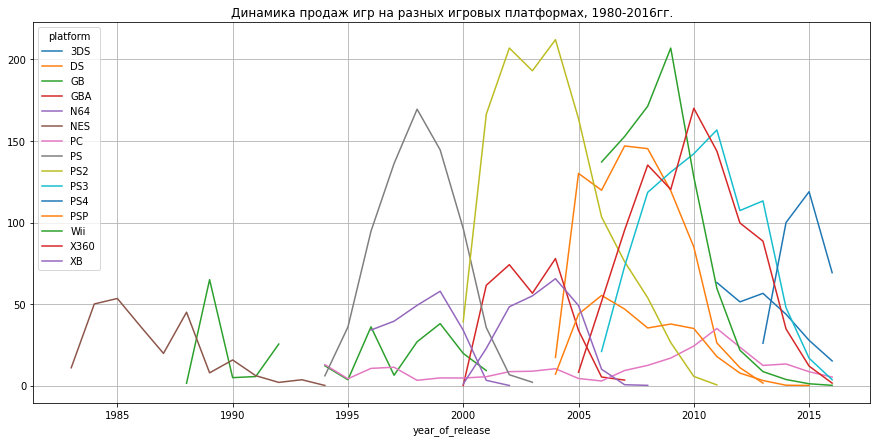

In [12]:
#сохраним топ-15 платформ по проданным копиям в список
top15platforms = result['platform'].tolist()

#сохраним датасет только с выбранными платформами
data_platforms = df[df['platform'].isin(top15platforms)]

#распределение проданных копий платформ по годам
data_platforms.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
              .plot(grid=True, figsize=(15, 7))
plt.title('Динамика продаж игр на разных игровых платформах, 1980-2016гг.');
plt.show()

Из динамики продаж игр на разных популярных игровых платформах видно, что до 1995 года было лишь 2 игровые консоли: Nes и GB. Далее начала сильно расти конкуренция и стало появлятся больше игровых платформ и большим количнством качественных игр.

In [13]:
#Длительность жизни популярных игровых платформ
pivot = data_platforms.pivot_table(index='platform', values='year_of_release', aggfunc=['min','max','nunique'])
columns = ['Год появления платформы', 'Год последнего релиза', 'Кол-во лет']
pivot.columns = [''.join(col) for col in columns]
result = pivot.sort_values(('Кол-во лет'), ascending=False).head(15).reset_index()
print(display(result))
print(result['Кол-во лет'].describe())

,platform,Год появления платформы,Год последнего релиза,Кол-во лет
0,PC,1985,2016,26
1,GB,1988,2001,13
2,NES,1983,1994,12
3,PS2,2000,2011,12
4,PSP,2004,2015,12
5,X360,2005,2016,12
6,DS,1985,2013,11
7,PS3,2006,2016,11
8,Wii,2006,2016,11
9,PS,1994,2003,10


None
count    15.000000
mean     10.933333
std       4.905779
min       4.000000
25%       8.500000
50%      11.000000
75%      12.000000
max      26.000000
Name: Кол-во лет, dtype: float64


Средняя продолжительность "жизни" игровой платформы среди топ-15 популярных составила 11 лет. Меньше всех (4 года) продавалась PS4, однако эта модель вышла только в 2013 году, поэтому она новая и актуальна также на 2020 год (до выхода PS5). Так что топ 3 самые низкие продолжительности жизни приходит на 3DS, N64 и GBA. Самое большое количество лет приходится на PC (26 лет), однако игры на компьюетры актуальны все время существования пк (и есть большая вероятность что в нашем датасете участвуют лишь официальные данные по скачиваниям). Топ-3 по кол-ву лет в использовании среди консольных платформ являются: GB, NES и PS2.

In [14]:
#график из слэка, не очень информативный
# figure(figsize=(15, 10), dpi=100)
# sns.barplot(data = data_platforms, x = 'platform', y ='total_sales', hue ='year_of_release');
# plt.legend(loc='upper right')

Определим актуальный период для верного анализа для будущей маркетинговой стратегии. Ранее мы выяснили, что с 2003 года началось большое развитие игровых платформ, однако для построения стратегии нужно взять более актуальные данные. С 2010 года на графике динамики продаж наблюдается общая тенденция снижения кол-ва проданных копий у всех платформ. В 2014 году также была нестабильная экономическая обстановка, которая также могла повлиять на кол-во проданный копий. Поэтому предлагается взять за период 6 лет (с 2011 года).

In [15]:
# OLD #возьмем данные для более подробного изучения за 2011-2016 года
# data = df[df['year_of_release']>=2011]
# print('Кол-во лет в датасете:',len(data['year_of_release'].unique()))

#возьмем данные для более подробного изучения за 2014-2016 года
data = df[df['year_of_release']>=2014]
print('Кол-во лет в датасете:',len(data['year_of_release'].unique()))

Кол-во лет в датасете: 3


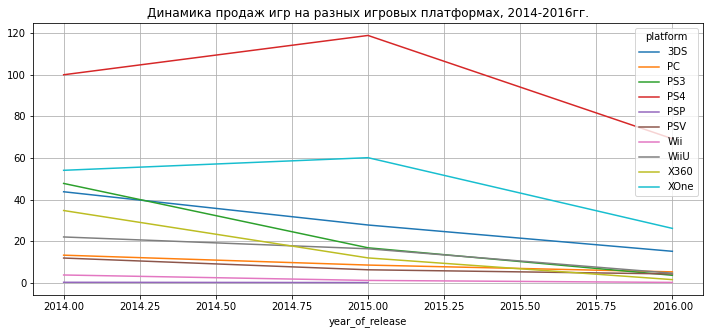

In [16]:
# Распределение проданных копий платформ по годам
data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
    .plot(grid=True, figsize=(12, 5))
plt.title('Динамика продаж игр на разных игровых платформах, 2014-2016гг.');
plt.show()

~~Рассматривая динамику проданных копий за последние 6 лет, стоит отметить низходящий тренд для всех платформ, кроме PS4 и XOne, которые стали конкурировать друг с другом с 2013 года. Этот тренд можно обьяснить снижением кол-ва выпускаемых игр. Игры стали делать дольше и качественнее. Также в современном мире нет резкого развития технологий, в последние годы разрабочики игр в основном делают фокус на небольшое улучшение графики, которая зависит от выхода новых видеокарт, а также на создание ремейков старых популярных франшиз.~~


Рассматривая динамику проданных копий за последние 3 года, стоит отметить небольшой низходящий тренд для всех платформ. Этот тренд можно обьяснить снижением кол-ва выпускаемых игр. Игры стали делать дольше и качественнее. Также в современном мире нет резкого развития технологий, в последние годы разрабочики игр в основном делают фокус на небольшое улучшение графики, которая зависит от выхода новых видеокарт, а также на создание ремейков старых популярных франшиз.
Отметим 3 потенциально прибыльные платформы: PS4, XOne и 3DS (3DS отличается от конкурентов тем, что это портативная приставка, первая версия которой была выпущена компанией Nintendo в 2010 году)

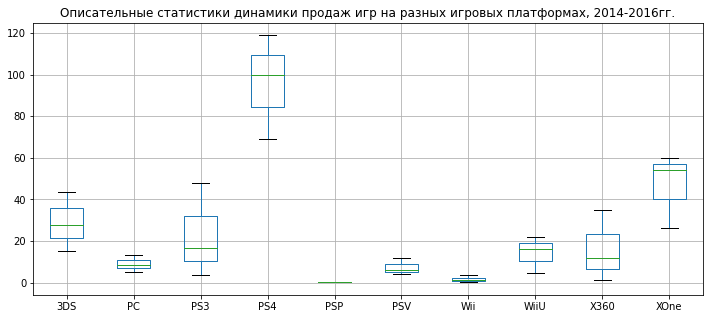

In [17]:
# Изучим описательные статистики глобальных продаж в разбивке по платформам
data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
    .boxplot(grid=True, figsize=(12, 5))
plt.title('Описательные статистики динамики продаж игр на разных игровых платформах, 2014-2016гг.');
plt.show()

~~Больше всего продаж у PS3, однако среднее число проданных копий больше у PS4. X360 стоит на 3-м месте по среднему кол-ву проданных игр, а за ней 3DS. Меньше всего за 6 лет c 2011 года было продано у PS2,PSV и PSP. Среди 12 платформ по нибольшему проданному кол-ву копий выделяются PS3,X360,PS4, 3DS и XOne.~~

Больше всего продаж и среднее число проданных копий больше у PS4. XOne занимает второе место по продажам.
3DS стоит на 3-м месте по среднему кол-ву проданных игр, а за ней PS3. Меньше всего за 3 года c 2014 было продано у Wii, PSP и PS2. Среди 12 платформ по нибольшему проданному кол-ву копий выделяются PS4,XOne,PS3,3DS и X360.

In [18]:
#изучим данные самой популярной и актуальной платформы PS4
PS_4 = data[data['platform']=='PS4']

# Изучим все взаимосвязи в датасете
print(display(PS_4.corr()))
print('коэф корреляции между оценкой критиков и продажами:', PS_4['critic_score'].corr(PS_4['total_sales'])) 
print('коэф корреляции между оценкой пользователей и продажами:', PS_4['user_score'].corr(PS_4['total_sales']))
print('коэф корреляции между оценкой пользователей и оценки критиков:', PS_4['user_score'].corr(PS_4['critic_score'])) 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.219443,-0.195176,-0.040969,-0.219129,-0.044226,0.035502,-0.214338
na_sales,-0.219443,1.000000,0.784902,0.491452,0.944903,0.411638,-0.016156,0.928090
eu_sales,-0.195176,0.784902,1.000000,0.472101,0.944380,0.340268,-0.064199,0.958109
jp_sales,-0.040969,0.491452,0.472101,1.000000,0.510433,0.379041,0.179384,0.538524
other_sales,-0.219129,0.944903,0.944380,0.510433,1.000000,0.404645,-0.044166,0.998252
critic_score,-0.044226,0.411638,0.340268,0.379041,0.404645,1.000000,0.546434,0.402661
user_score,0.035502,-0.016156,-0.064199,0.179384,-0.044166,0.546434,1.000000,-0.040132
total_sales,-0.214338,0.928090,0.958109,0.538524,0.998252,0.402661,-0.040132,1.000000


None
коэф корреляции между оценкой критиков и продажами: 0.40266141068104083
коэф корреляции между оценкой пользователей и продажами: -0.040131589472697356
коэф корреляции между оценкой пользователей и оценки критиков: 0.546434245119031


Text(0.5, 1.0, 'Взаимосвзяь оценок критиков и пользователей')

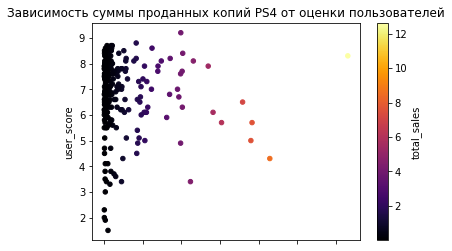

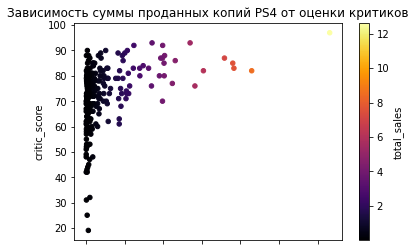

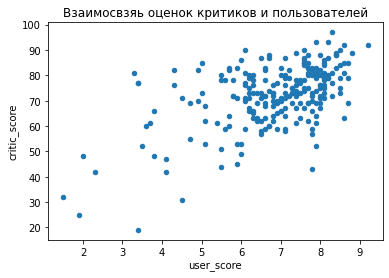

In [19]:
### Построим графики найденных зависимостей

# Зависимость суммы проданных копий от оценки пользователей
PS_4.plot.scatter(x='total_sales', y='user_score',c='total_sales',colormap='inferno')
plt.title('Зависимость суммы проданных копий PS4 от оценки пользователей')

# Зависимость суммы проданных копий от оценки критиков
PS_4.plot.scatter(x='total_sales', y='critic_score',c='total_sales',colormap='inferno')
plt.title('Зависимость суммы проданных копий PS4 от оценки критиков')

# Взаимосвзяь оценок критиков и пользователей
PS_4.plot.scatter(x='user_score', y='critic_score')
plt.title('Взаимосвзяь оценок критиков и пользователей')

Платформа PS4.

Оценка критиков влияет сильнее на общие продажи чем оценка пользователей. Однако взаимосвязь имеет слабое влияние (коэффициент корреляции значительно меньше 1 (0.40)). Существует также прямая зависимость между оценкой пользователей и оценкой критиков, что говорит о совпадений мнений пользователей. Однако коэффициент корреляции составил только 54%, из графика также видно что некоторые игры пользователями были оценены низко, в то время как критики поставили высокую оценку (возможно игровые компании могли накрутить или выкупить высокие рейтинги для продвижения игры). В конце концов можно подвердить наличие небольшого влияния оценок критиков на итоговые полные продажи копий игр.

XOne
коэф корреляции между оценкой критиков и продажами: 0.42867694370333226
коэф корреляции между оценкой пользователей и продажами: -0.0703839280647581
коэф корреляции между оценкой пользователей и оценки критиков: 0.44097734837644115
3DS
коэф корреляции между оценкой критиков и продажами: 0.314117492869051
коэф корреляции между оценкой пользователей и продажами: 0.2151932718527028
коэф корреляции между оценкой пользователей и оценки критиков: 0.862484552934546


Text(0.5, 1.0, 'Зависимость суммы проданных копий DS от оценки критиков')

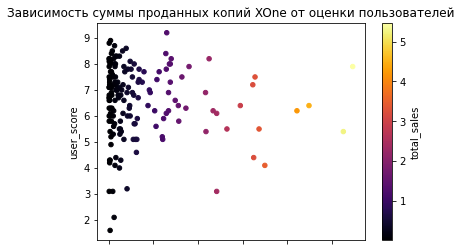

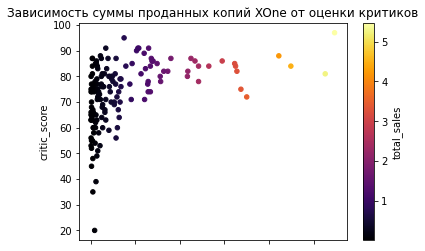

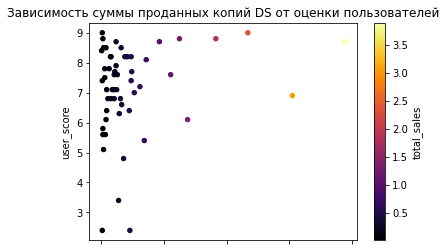

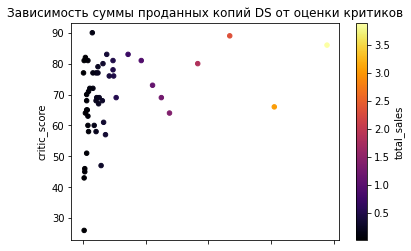

In [20]:
# Посмотрим аналогичные взаимосвязи у XOne и 3DS
### XOne
XOne = data[data['platform']=='XOne']
print('XOne')
print('коэф корреляции между оценкой критиков и продажами:', XOne['critic_score'].corr(XOne['total_sales'])) 
print('коэф корреляции между оценкой пользователей и продажами:', XOne['user_score'].corr(XOne['total_sales']))
print('коэф корреляции между оценкой пользователей и оценки критиков:', XOne['user_score'].corr(XOne['critic_score'])) 

### 3DS
DS = data[data['platform']=='3DS']
print('3DS')
print('коэф корреляции между оценкой критиков и продажами:', DS['critic_score'].corr(DS['total_sales'])) 
print('коэф корреляции между оценкой пользователей и продажами:', DS['user_score'].corr(DS['total_sales']))
print('коэф корреляции между оценкой пользователей и оценки критиков:', DS['user_score'].corr(DS['critic_score'])) 


# Зависимость суммы проданных копий от оценки пользователей
XOne.plot.scatter(x='total_sales', y='user_score',c='total_sales',colormap='inferno')
plt.title('Зависимость суммы проданных копий XOne от оценки пользователей')

# Зависимость суммы проданных копий от оценки критиков
XOne.plot.scatter(x='total_sales', y='critic_score',c='total_sales',colormap='inferno')
plt.title('Зависимость суммы проданных копий XOne от оценки критиков')


# Зависимость суммы проданных копий от оценки пользователей
DS.plot.scatter(x='total_sales', y='user_score',c='total_sales',colormap='inferno')
plt.title('Зависимость суммы проданных копий DS от оценки пользователей')

# Зависимость суммы проданных копий от оценки критиков
DS.plot.scatter(x='total_sales', y='critic_score',c='total_sales',colormap='inferno')
plt.title('Зависимость суммы проданных копий DS от оценки критиков')

- Соотнесите выводы с продажами игр на других платформах.

Платформа Xone.

Оценка критиков влияет сильнее на общие продажи чем оценка пользователей. Однако взаимосвязь имеет слабое влияние (коэффициент корреляции значительно меньше 1 (0.42)). Существует также прямая слабая зависимость между оценкой пользователей и оценкой критиков. Однако коэффициент корреляции составил только 44%. В конце концов можно подвердить наличие небольшого влияния оценок критиков на итоговые полные продажи копий игр.

Платформа 3DS.

Оценка критиков влияет сильнее на общие продажи чем оценка пользователей. Однако взаимосвязь имеет слабое влияние (коэффициент корреляции значительно меньше 1 (0.31)). Существует также прямая сильная зависимость между оценкой пользователей и оценкой критиков, что говорит о совпадений мнений пользователей. Коэффициент корреляции составил 86%. Существует наличие влияния оценок критиков на итоговые полные продажи копий игр.

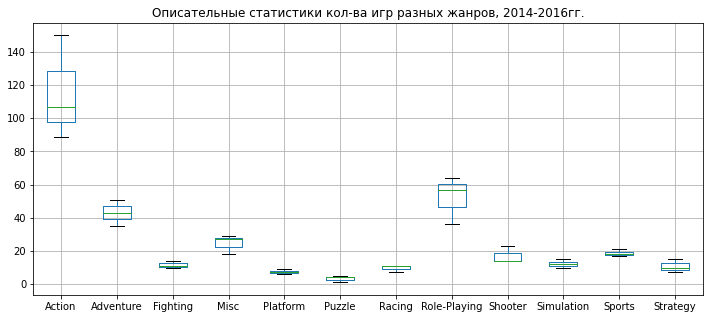

In [21]:
# Изучим описательные статистики выпускаемых игр в разбивке по игровым жанрам
data.pivot_table(index='year_of_release', columns = 'genre', values='name', aggfunc='nunique')\
    .boxplot(grid=True, figsize=(12, 5))
plt.title('Описательные статистики кол-ва игр разных жанров, 2014-2016гг.');
plt.show()

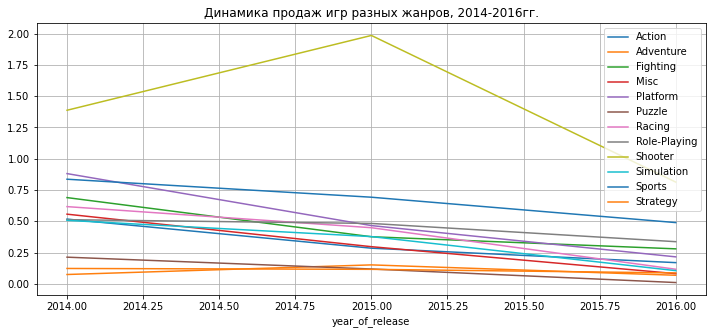

In [22]:
# Распределение средних значений проданных копий игр по годам разных жанров
data.pivot_table(index='year_of_release', columns = 'genre', values='total_sales', aggfunc='mean')\
    .plot(grid=True, figsize=(12, 5))
plt.title('Динамика продаж игр разных жанров, 2014-2016гг.');
plt.legend(loc='upper right')
plt.show()

Больше всего в датасете игр с жанром Action, второй по популярности выпускаемых игр — это жанр Role-Playing, третий по кол-ву выпущенных игр — Adventure.

Жанр Shooter явлется лидером по средним проданным копиям на протяжении всего рассматриваемого периода. Жанр Action занимает второе место по средним продажам за последние 3 года. За попадание в тройку по средним проданным копиям конкурировали Platform и Role-Playing. Самые непродаваемые жанры оказались Puzzle и Strategy. Меньше всего существует игр в жанрах Puzzle и Platform.`

Топ-5 прибыльных жанров: Shooter, Action, Role-Playing, Fighting, Sports.

**Итоги исследовательского анализа:**
* Большинство игр стало выпускаться с 2003, когда появилась большая конкуренция между разработчиками платформ
* По сумме выпущенных копий игр с 1980 года лидируют платформы GB, NES и X360
* Высокие продажи игр стали появлятся с 1997 года
* Средняя продолжительность "жизни" игровой платформы среди топ-15 популярных составила 11 лет 
* Дольше всего в использовании были платформы GB, NES и PS2
* Для углубленного анализа был выбран период 3 года с 2014 года
* PS4, XOne и 3DS лидируют по продажам последние несколько лет
* Больше всего продано копий у PS4, XOne, 3DS, PS3 и X360,
* Существует влияние оценок критиков на итоговые продажи игр
* Оценка критиков влияет сильнее на общие продажи чем оценка пользователей
* Самые прибыльные жанры: Shooter, Action, Role-Playing, Fighting, Sports.

### Портрет пользователя каждого региона

Популярные платформы NA platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64


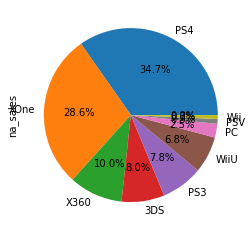


Популярные платформы EU platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64


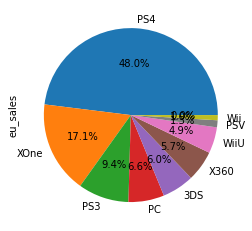


Популярные платформы JP platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


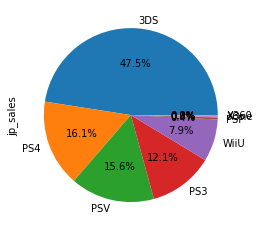

In [23]:
#Самые популярные платформы каждого региона (NA, EU, JP):
print('Популярные платформы NA', data.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5))
data.groupby('platform')['na_sales'].sum().sort_values(ascending = False).plot(kind = 'pie',autopct='%1.1f%%')
plt.show()
print('')

print('Популярные платформы EU', data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5))
data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'pie',autopct='%1.1f%%')
plt.show()
print('')

print('Популярные платформы JP', data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5))
data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

Популярные жанры NA genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64


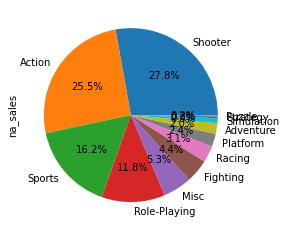


Популярные жанры EU genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64


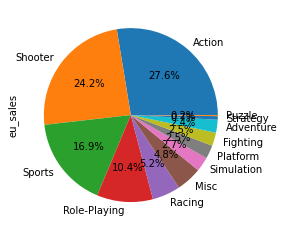


Популярные жанры JP genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


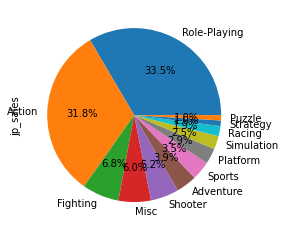

In [24]:
#Самые популярные жанры каждого региона (NA, EU, JP):
print('Популярные жанры NA', data.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5))
data.groupby('genre')['na_sales'].sum().sort_values(ascending = False).plot(kind = 'pie',autopct='%1.1f%%')
plt.show()
print('')

print('Популярные жанры EU', data.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5))
data.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).plot(kind = 'pie',autopct='%1.1f%%')
plt.show()
print('')

print('Популярные жанры JP', data.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5))
data.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

**NA** 
Игроки в 35% предпочитают PS4, в 29% XOne и 10% X360. При этом 28% играют в Shooter игры, 26% в Action и 16% в Sports.

**EU** 
Игроки в 48% предпочитают PS4, в 17% XOne и 9,4% PS3. При этом 27% играют в Action игры, 24% в Shooter и 17% в Sports.

**JP** 
Игроки в 48% предпочитают 3DS, в 16% PS4 и 15,6% PSV. При этом 34% играют в Role-Playing игры, 32% в Action и 7% в Fighting.

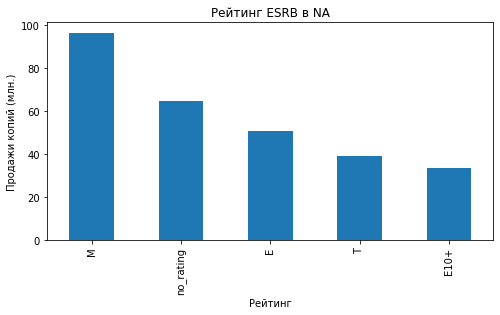

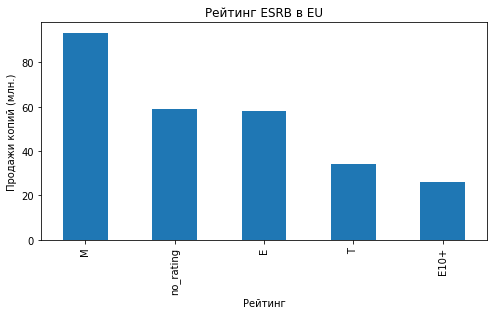

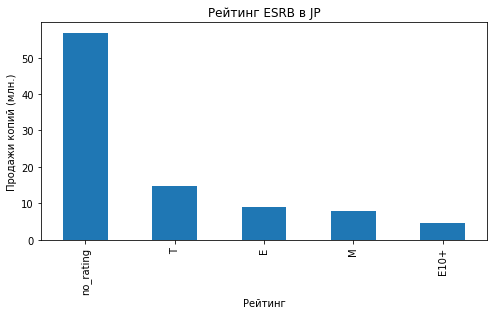

In [25]:
### Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?
#там где не проставлен рейтинг, добавим "no_rating"
data['rating'] = data['rating'].fillna('no_rating')

# Рейтинг ESRB в NA
rating_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(8,4), title = 'Рейтинг ESRB в NA')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи копий (млн.)')
plt.show()

# Рейтинг ESRB в EU
rating_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(8,4), title = 'Рейтинг ESRB в EU')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи копий (млн.)')
plt.show()

# Рейтинг ESRB в NA
rating_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(8,4), title = 'Рейтинг ESRB в JP')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи копий (млн.)')
plt.show()

**NA** 
Основная часть игр имеет рейтинг M. Второе место занимают игры без рейтинга ESRB. Третье — E.

**EU** 
Основная часть игр имеет рейтинг M. Второе место занимают игры без рейтинга ESRB. Третье — E.

**JP** 
Основная часть игр не имеет рейтинга ESRB. Второе место занимают игры с рейтингом T. Третье — Е.

###  Проверка гипотез

In [26]:
from scipy import stats as st
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# H0 = рейтинги игр на Xbox One и PC не отличаются друг от друга
# H1 = рейтинги игр на Xbox One и PC сильно различаются друг от друга


XOne = data[data['platform']=='XOne']
PC = data[data['platform']=='PC']

sample_XOne = XOne['user_score']
sample_PC = PC['user_score']


alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_XOne, 
    sample_PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


С 37% вероятностью мы можем предположить, что пользовательские рейтинги игр на Xbox One и PC не отличаются друг от друга

In [27]:
# Средние пользовательские рейтинги жанров *Action* и *Sports* разные
# H0 = рейтинги игр на Action и Sports не отличаются друг от друга
# H1 = рейтинги игр на Action и Sports сильно различаются друг от друга

Action = data[data['genre']=='Action']
Sports = data[data['genre']=='Sports']

sample_Action = Action['user_score']
sample_Sports = Sports['user_score']


alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_Action, 
    sample_Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


P-value получился крайне малым, гипотеза об отсутсвии отличий среди пользовательский рейтингов на игры жанров *Action* и *Sports* отвергается. Рейтинги рассматриваемых двух жанров отличаются друг от друга.

Так как в обоих случаях мы проверяли гипотезы о равенстве средних двух генеральных совокупностей, где генеральные совокупности не зависят друг от друга и выборочные средние должны быть нормально распределены,то для проверки мы использовали T критерий для двух совокупностей st.ttest_ind. Критический уровень значимости выбрали равным 5%.

### Общий вывод

Для успешной стратегии для NA и EU рынков стоит уделить внимание актуальным платформам PS4 (при этом допродать PS3) и Xbox 360, играм в жанрах Action, Shooter и Sports c рейтингами M и E.

Для успешной стратегии для JP рынка стоит уделить внимание портативным консолям 3DS и PSP, а также PS4 (при этом допродать PS3), играм в жанрах Role-Playing и Action c рейтингами E и T.


Для более точного прогноза следует проанализировать более актуаьыне данные, а также важно посмотреть на бум продаж на фоне пандемии, почему PS5 сложно было купить на релизе.